# Assignment - Exercise 6.2 Titanic Case Study Part1
## Week#6
## Date - July-15-2021
## Author - Ganesh Kale

# Graphic Analysis

#### _import required packages_

In [1]:
import numpy as np
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### _load data into dataframe_

In [2]:
titanic = pd.read_csv("data/titanic.csv")

#### _display dimension and top 5 records from dataframe_

In [3]:
titanic.shape
titanic.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### _display variables type and counts_

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### _descriptive stats summary of numerical variables_

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### _summary of variables with object data type_

In [6]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Doling, Mrs. John T (Ada Julia Bone)",male,1601,G6,S
freq,1,577,7,4,644


## Data Visualization

In [7]:
# set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

In [8]:
# Specify the features of interest

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

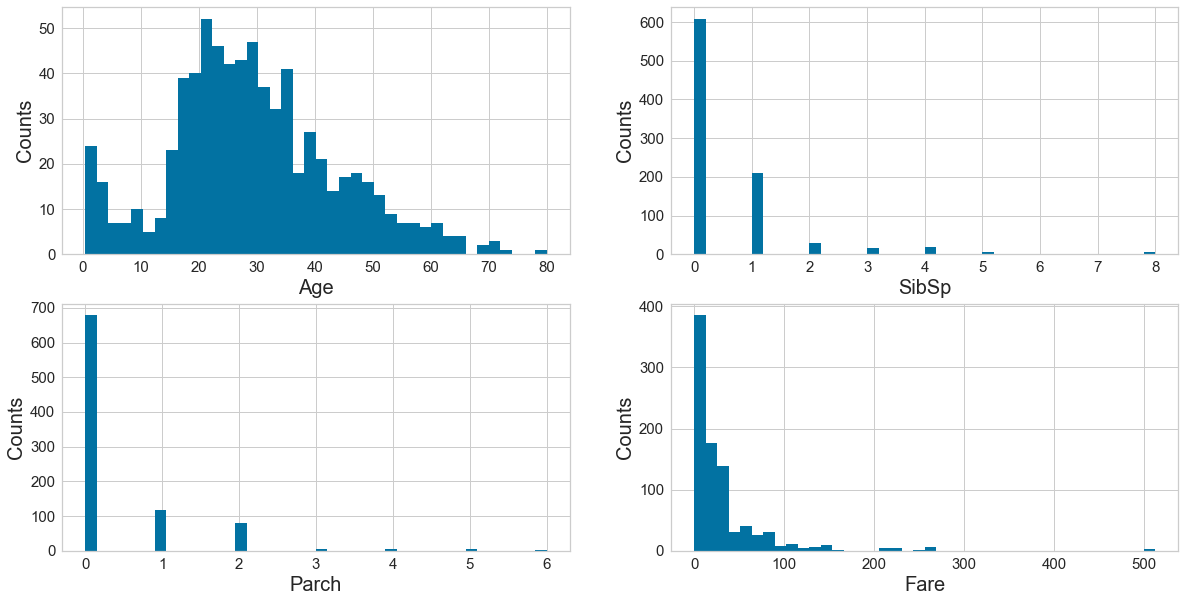

In [9]:
# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw histograms

axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show();

In [10]:
# Barcharts: set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

#### _prepare data for bar plots_

In [11]:
# make the survived data read to feed into the visulizer
X_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the Pclass data read to feed into the visulizer
X_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the Sex data read to feed into the visulizer
X_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the Embarked data read to feed into the visulizer
X_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Counts']

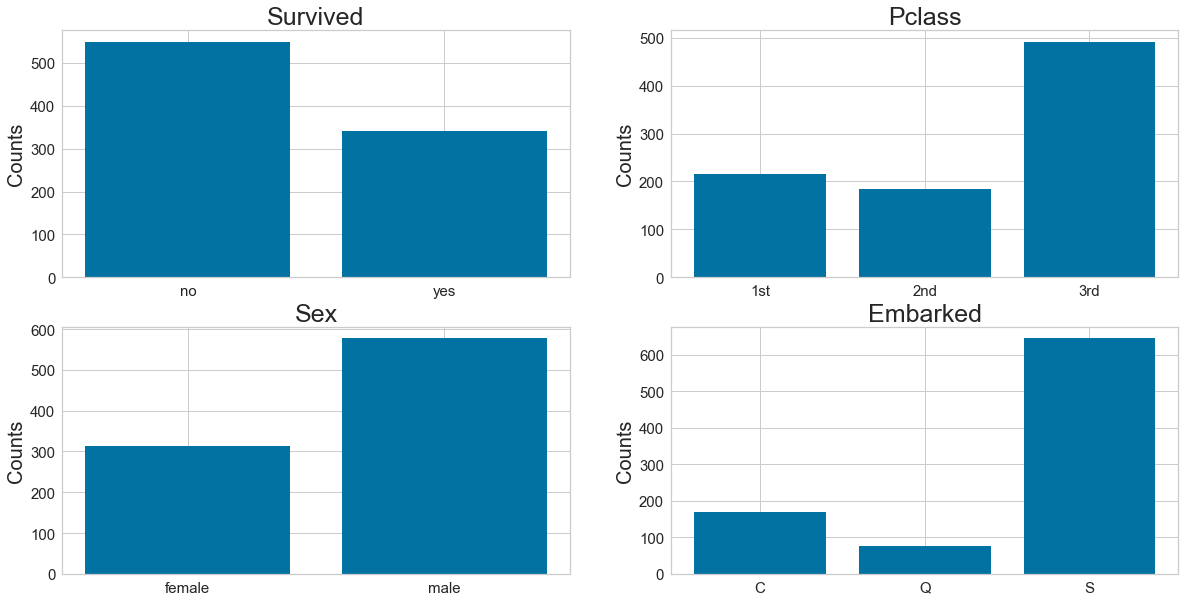

In [12]:
# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the bar plot for - Survived variable
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the bar plot for - PClass variable
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


# make the bar plot for - Sex Variable
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the bar plot for - Embarked variable
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show();


#### _Pearson Ranking_

In [13]:
# set up figure size

plt.rcParams['figure.figsize'] = (15, 7)

In [41]:
# import the package for visulization of the correlation

from yellowbrick.features import Rank2D

In [42]:
# extract the numpy arrays from the data frame

X = titanic[num_features].values

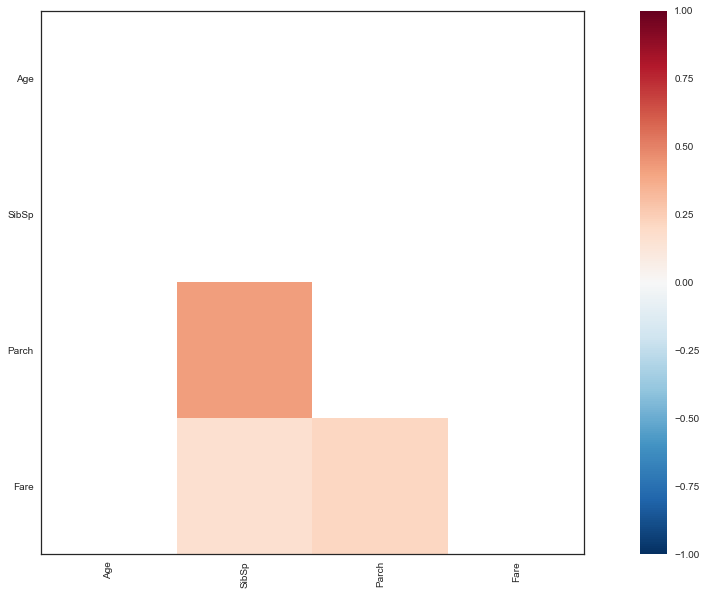

In [46]:
# instantiate the visualizer with the Covariance ranking algorithm

visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
# visualizer.poof(outpath="data/pcoords1.png") # Draw/show/poof the data
plt.show();

#### _Compare variables against Survived and Not Survived_

In [17]:
#set up the figure size

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [18]:
# setup the color for yellowbrick visulizer

from yellowbrick.style import set_palette
set_palette('sns_bright')

In [19]:
# import packages

from yellowbrick.features import ParallelCoordinates

In [20]:
# Specify the features of interest and the classes of the target

classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']


In [21]:
# copy data to a new dataframe

data_norm = titanic.copy()

In [22]:
# normalize data to 0-1 range

for feature in num_features:
    data_norm[feature] = (titanic[feature] - titanic[feature].mean(skipna=True)) / (titanic[feature].max(skipna=True) - titanic[feature].min(skipna=True))


In [23]:
# Extract the numpy arrays from the data frame

X = data_norm[num_features].values
y = titanic.Survived.values

In [24]:
# Instantiate the visualizer

visualizer = ParallelCoordinates(classes=classes, features=num_features)

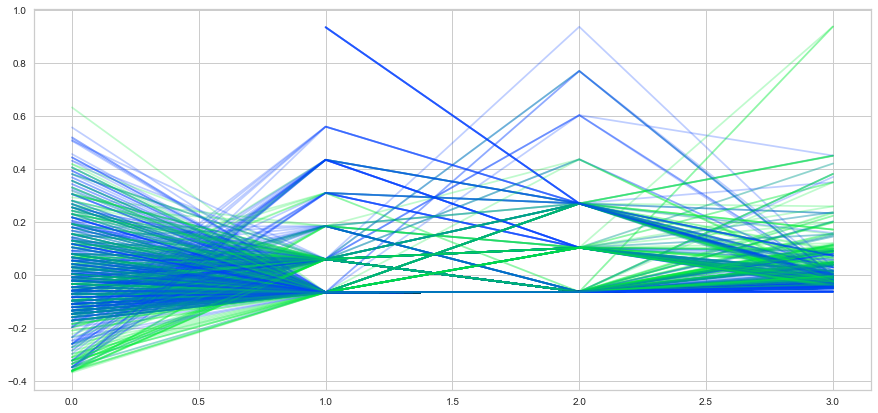

In [25]:

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();


#### _stacked bar charts to compare survived/not survived_

In [26]:
#set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

#### _prepare data for stacked bar plots_

In [27]:
# make the data read to feed into the visulizer - sex variable - Survived vs not-survived

Sex_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Sex'].value_counts()
Sex_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)


# make the data read to feed into the visualizer -  Pclass Variable
Pclass_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)


# make the data read to feed into the visualizer - Embarked variable
Embarked_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

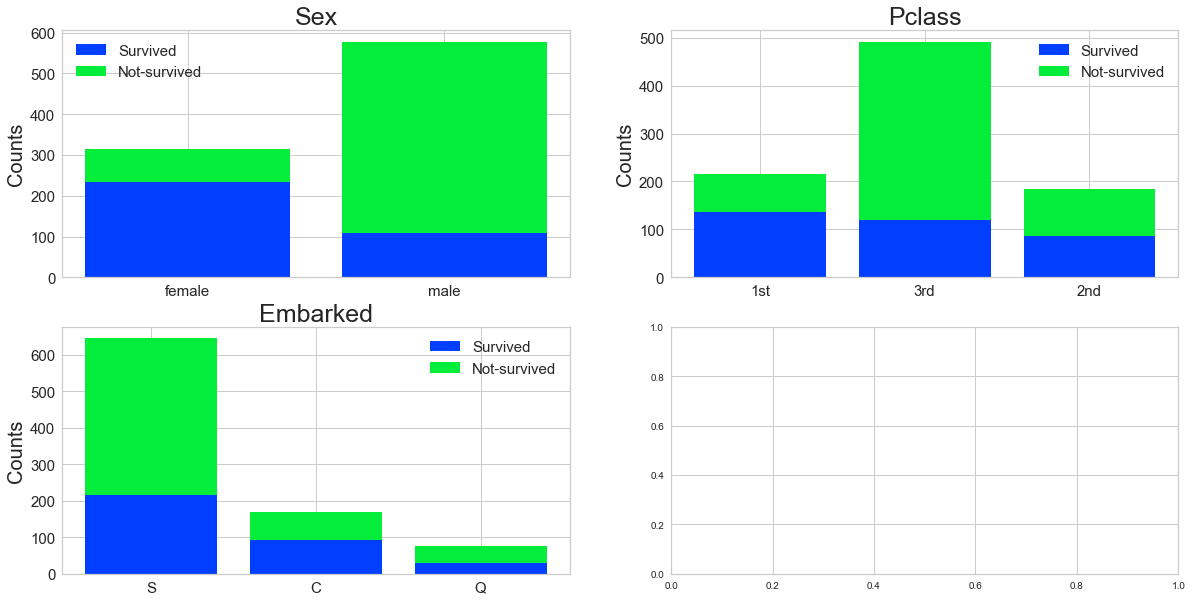

In [28]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)


# make the bar plot - Sex variable
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the bar plot - PClass variable
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the bar plot - EMbarked variable
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show();

# END